**The first three units are used for colab: if you simply run the code on python notebook, please ignore the first three units below.**

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
··········


In [6]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import os
os.chdir("drive/Colab Notebooks") 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
from sklearn.linear_model import LogisticRegression

In [0]:
data=pd.read_csv("./final_project_data.csv")
data=data.dropna()
data.index=range(len(data))

In [10]:
data.shape

(3547259, 43)

In [7]:
data.columns # get columns names

Index(['date', 'id', 'industry', 'ret_raw', 'flag', 'ret_20_raw', 'flag2',
       'ret_raw_norm', 'ret_20_raw_norm', 'ret_raw_norm_lag_21',
       'ret_raw_norm_lag_22', 'ret_raw_norm_lag_23', 'ret_raw_norm_lag_24',
       'ret_raw_norm_lag_25', 'ret_raw_norm_lag_26', 'ret_raw_norm_lag_27',
       'ret_raw_norm_lag_28', 'ret_raw_norm_lag_29', 'ret_raw_norm_lag_30',
       'ret_raw_norm_lag_31', 'ret_raw_norm_lag_32', 'ret_raw_norm_lag_33',
       'ret_raw_norm_lag_34', 'ret_raw_norm_lag_35', 'ret_raw_norm_lag_36',
       'ret_raw_norm_lag_37', 'ret_raw_norm_lag_38', 'ret_raw_norm_lag_39',
       'ret_raw_norm_lag_40', 'ret_20_raw_norm_lag_41_60',
       'ret_20_raw_norm_lag_61_80', 'ret_20_raw_norm_lag_81_100',
       'ret_20_raw_norm_lag_101_120', 'ret_20_raw_norm_lag_121_140',
       'ret_20_raw_norm_lag_141_160', 'ret_20_raw_norm_lag_161_180',
       'ret_20_raw_norm_lag_181_200', 'ret_20_raw_norm_lag_201_220',
       'ret_20_raw_norm_lag_221_240', 'ret_20_raw_norm_lag_241_260',
   

In [8]:
data.head()

,date,id,industry,ret_raw,flag,ret_20_raw,flag2,ret_raw_norm,ret_20_raw_norm,ret_raw_norm_lag_21,ret_raw_norm_lag_22,ret_raw_norm_lag_23,ret_raw_norm_lag_24,ret_raw_norm_lag_25,ret_raw_norm_lag_26,ret_raw_norm_lag_27,ret_raw_norm_lag_28,ret_raw_norm_lag_29,ret_raw_norm_lag_30,ret_raw_norm_lag_31,ret_raw_norm_lag_32,ret_raw_norm_lag_33,ret_raw_norm_lag_34,ret_raw_norm_lag_35,ret_raw_norm_lag_36,ret_raw_norm_lag_37,ret_raw_norm_lag_38,ret_raw_norm_lag_39,ret_raw_norm_lag_40,ret_20_raw_norm_lag_41_60,ret_20_raw_norm_lag_61_80,ret_20_raw_norm_lag_81_100,ret_20_raw_norm_lag_101_120,ret_20_raw_norm_lag_121_140,ret_20_raw_norm_lag_141_160,ret_20_raw_norm_lag_161_180,ret_20_raw_norm_lag_181_200,ret_20_raw_norm_lag_201_220,ret_20_raw_norm_lag_221_240,ret_20_raw_norm_lag_241_260,ret_20_raw_norm_lag_261_280,isJan,target
0,20080214,A US Equity,3520,-0.034888,True,-0.115785,False,-0.626602,-1.155291,-0.342618,0.239199,0.290432,-0.299998,1.242919,-0.135493,0.738161,0.518395,-0.045446,-0.015960,0.124973,-0.599338,0.431121,0.604640,0.675931,-0.981560,0.109574,0.634206,0.455507,-0.976536,0.941194,-0.609156,0.169026,0.575599,-0.927360,0.184879,0.157539,1.093994,-0.189996,0.915039,-0.259174,-1.240792,0.0,0.0
1,20080214,AA US Equity,1510,-0.004224,True,0.160461,False,0.538586,1.116039,-0.616964,-1.130579,1.024218,1.042763,-0.090402,0.049674,-1.507438,-1.764537,-0.195492,0.423485,0.145005,-0.113882,-0.139463,0.478129,0.548092,0.367777,0.343625,0.641347,0.069004,0.082101,-0.215580,0.078288,0.081052,0.034549,-0.811019,0.657379,-0.466201,1.449841,0.170922,0.042121,0.339868,1.037797,0.0,1.0
2,20080214,AAN US Equity,2550,0.000000,True,0.102639,False,0.699089,0.640614,0.803338,-0.177193,0.768082,-0.948039,-0.787746,0.224786,-0.706792,0.810945,0.104071,-0.971549,-0.300791,-0.107117,2.036342,-2.962579,-0.303110,0.221689,0.373609,0.923508,-0.435132,0.287328,-1.192507,0.542157,-0.805092,-1.935386,1.306399,-2.065115,0.532074,-0.593705,0.523305,-0.527815,-1.058531,0.101127,0.0,1.0
3,20080214,AAON US Equity,2010,-0.046684,True,0.013005,False,-1.074841,-0.096364,-0.091706,-0.331058,1.208945,-1.732725,-0.621379,0.889487,-0.669659,1.237932,0.371761,-1.195792,-1.537159,-0.812690,0.211680,-1.087002,-2.045832,1.648651,1.310390,0.055856,-0.526996,0.884772,0.519695,0.573596,-1.492775,-0.691333,0.782537,-0.145668,1.478548,1.629201,-1.186070,-1.054264,0.029782,0.089869,0.0,0.0
4,20080214,AAP US Equity,2550,-0.040387,True,0.064812,False,-0.835580,0.329595,0.635282,0.057801,-0.559927,-1.075341,-1.490842,-0.724744,-1.066548,1.499499,-1.099374,0.724629,0.184631,0.039916,-0.076214,0.578137,0.130947,-0.632575,-0.747810,0.097608,0.166131,-0.439144,0.964655,1.230328,-0.651964,-0.062124,-0.844002,-0.495810,-0.335421,-0.517209,0.466003,0.442235,-0.078167,0.179575,0.0,1.0


### 33 Model Input Features (momentum driven features):


'ret_raw_norm_lag_21',
'ret_raw_norm_lag_22', 'ret_raw_norm_lag_23', 'ret_raw_norm_lag_24',
'ret_raw_norm_lag_25', 'ret_raw_norm_lag_26', 'ret_raw_norm_lag_27',
'ret_raw_norm_lag_28', 'ret_raw_norm_lag_29', 'ret_raw_norm_lag_30',
'ret_raw_norm_lag_31', 'ret_raw_norm_lag_32', 'ret_raw_norm_lag_33',
'ret_raw_norm_lag_34', 'ret_raw_norm_lag_35', 'ret_raw_norm_lag_36',
'ret_raw_norm_lag_37', 'ret_raw_norm_lag_38', 'ret_raw_norm_lag_39',
'ret_raw_norm_lag_40', 'ret_20_raw_norm_lag_41_60',
'ret_20_raw_norm_lag_61_80', 'ret_20_raw_norm_lag_81_100',
'ret_20_raw_norm_lag_101_120', 'ret_20_raw_norm_lag_121_140',
'ret_20_raw_norm_lag_141_160', 'ret_20_raw_norm_lag_161_180',
'ret_20_raw_norm_lag_181_200', 'ret_20_raw_norm_lag_201_220',
'ret_20_raw_norm_lag_221_240', 'ret_20_raw_norm_lag_241_260',
'ret_20_raw_norm_lag_261_280', 'isJan',



### Model Output/Target

'target'

### Logistic Regression - Baseline Strategy
Use 5 years data for training and subsequent 1 year data for testing

In [50]:
for i in (range (2012,2013)):  # i = 2012
    train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]  #from 20080101 to 20121231
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))] #from 20130101 to 20131231
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    
    clf=LogisticRegression(n_jobs=-1, solver='lbfgs')
    clf.fit(X_train, Y_train)
    #res=pd.concat((test.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_test))),axis=1)
    res=pd.concat((train.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_train))),axis=1) # in_sample
    res.columns=["id","date",'target',"pred_zsprob_comp","Alp"]
    res.index=range(len(res))
    globals()["result_{}".format(i)]=res.copy()
    print("result_{}".format(i))

result_2012


In [51]:
for i in range (2012,2017): # i = 2012,2013,2014,2015,2016
    train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))]
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    
    clf=LogisticRegression(n_jobs=-1, solver='lbfgs')
    clf.fit(X_train, Y_train)
    res=pd.concat((test.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_test))),axis=1)
    #res=pd.concat((train.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_train))),axis=1) # in_sample
    res.columns=["id","date",'target',"pred_zsprob_comp","Alp"]
    res.index=range(len(res))
    globals()["result_{}".format(i+1)]=res.copy()
    print("result_{}".format(i+1))

result_2013
result_2014
result_2015
result_2016
result_2017


In [0]:
RES=result_2012
for i in range(2013,2018):
    RES=pd.concat((RES,globals()["result_{}".format(i)]),axis=0)

tt=RES.merge(data.loc[:,["id","date","ret_raw","ret_20_raw","industry","flag2"]],left_on=["date","id"],right_on=["date","id"],how="left")

### Your Model

Use 5 years data for training and subsequent 1 year data for testing. For cross-validation, do 90/10 split of your training data to obtain optimal hyper-parameters.  

### Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
def RunRandomForest(n_estimators=10,max_depth=None,min_samples_split=2):
    np.random.seed(42)
    i=2012
    train=data[(data.date<=int(str(i-1)+'1231'))&(data.date>=int(str(i-4)+'0101'))]  #from 20080101 to 20121231

    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i)+'0101'))] #from 20130101 to 20131231
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    
    clf=RandomForestClassifier(n_estimators=n_estimators,max_depth=None,min_samples_split=min_samples_split,n_jobs=-1)
    clf.fit(X_train, Y_train)
    
    X_train_predict=clf.predict_proba(X_train)
    inAcc=np.mean((X_train_predict[:,1]>=0.5)==(Y_train))
    inCroEntro = -np.mean(np.log(X_train_predict[:,1]+0.0001)*Y_train+(1-Y_train)*np.log(1-X_train_predict[:,1]+0.0001))
    X_test_predict=clf.predict_proba(X_test)
    outAcc=np.mean((X_test_predict[:,1]>=0.5)==(Y_test))
    outCroEntro = -np.mean(np.log(X_test_predict[:,1]+0.0001)*Y_test+(1-Y_test)*np.log(1-X_test_predict[:,1]+0.0001))
    
    ''''
    We could use code here for cross validation. But it is not reasonable to apply cross validation for time series data because it is meaning less to use today's data to predict yesterday's result.
    from sklearn.model_selection import cross_val_score
    
    outCroEntro = cross_val_score(clf, X_train, Y_train, cv=10)
    outAcc = np.mean((cross_val_predict(clf,X_train, Y_train, cv=10))==(Y_train))
    
    ''''
    
    print("n_estimators=",n_estimators,"max_depth=",max_depth,"min_samples_split=",min_samples_split)
    print(inAcc,outAcc,inCroEntro,outCroEntro)

    return np.array([[inAcc,outAcc,inCroEntro,outCroEntro]])

### Default Random Rorest

In [19]:
RunRandomForest()

n_estimators= 10 max_depth= None min_samples_split= 2
0.9868888203979149 0.50286040416226 0.2113187822303945 0.7588914227232516


array([[0.98688882, 0.5028604 , 0.21131878, 0.75889142]])

### Random Forest with Different min_samples_split

In [21]:
result=RunRandomForest(min_samples_split=int(10**0.5))
for i in range(10,65,5):
  result = np.concatenate((result,RunRandomForest(min_samples_split=int(10**(i/10)))),axis=0)

n_estimators= 10 max_depth= None min_samples_split= 3
0.9867042116930995 0.5036637517142138 0.2212460901322212 0.7552977828641494
n_estimators= 10 max_depth= None min_samples_split= 10
0.9703691144090659 0.5025168851753975 0.32119875139683146 0.7353298778098263
n_estimators= 10 max_depth= None min_samples_split= 31
0.9031311379423181 0.5048160280008548 0.47106845673924846 0.7156472832670515
n_estimators= 10 max_depth= None min_samples_split= 100
0.7843564326625884 0.5067608323438003 0.5909751803822249 0.7027522328671112
n_estimators= 10 max_depth= None min_samples_split= 316
0.684761224882718 0.5070042709959075 0.6484452241075883 0.6965098557767979
n_estimators= 10 max_depth= None min_samples_split= 1000
0.6147913565095169 0.5070637782219782 0.673445095033207 0.6942928074284365
n_estimators= 10 max_depth= None min_samples_split= 3162
0.570832300026384 0.5066526373873081 0.684299524387589 0.6932693034967647
n_estimators= 10 max_depth= None min_samples_split= 10000
0.5448571421780183 0.5

In [0]:
result1=result.copy()

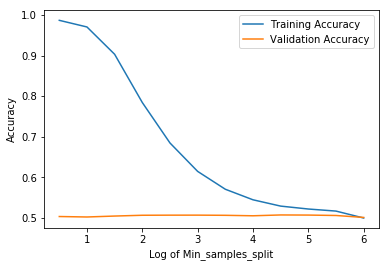

In [24]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

_ = ax.plot(np.linspace(0.5,6,12),result1[:,0],label="Training Accuracy")
_ = ax.plot(np.linspace(0.5,6,12),result1[:,1],label="Validation Accuracy")
_ = ax.set_xlabel("Log of Min_samples_split")
_ = ax.set_ylabel("Accuracy")
_ = ax.legend()

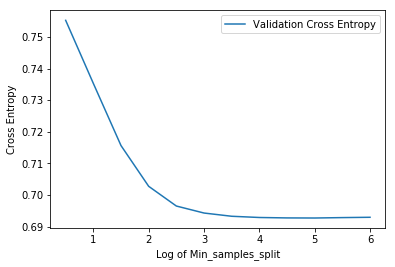

In [25]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

_ = ax.plot(np.linspace(0.5,6.0,12),result1[:,3],label="Validation Cross Entropy")
_ = ax.set_xlabel("Log of Min_samples_split")
_ = ax.set_ylabel("Cross Entropy")
_ = ax.legend()

### Random Forest with Different Max_depth

In [14]:
result=RunRandomForest(max_depth=50,min_samples_split=10000)
for i in range(100,500,50):
  result = np.concatenate((result,RunRandomForest(max_depth=i,min_samples_split=10000)),axis=0)

n_estimators= 10 max_depth= 50 min_samples_split= 10000
0.5448571421780183 0.5054733123615442 0.6890301827817963 0.6928808004830329
n_estimators= 10 max_depth= 100 min_samples_split= 10000
0.5448571421780183 0.5054733123615442 0.6890301827817963 0.692880800483033
n_estimators= 10 max_depth= 150 min_samples_split= 10000
0.5448571421780183 0.5054733123615442 0.6890301827817963 0.692880800483033
n_estimators= 10 max_depth= 200 min_samples_split= 10000
0.5448571421780183 0.5054733123615442 0.6890301827817963 0.692880800483033
n_estimators= 10 max_depth= 250 min_samples_split= 10000
0.5448571421780183 0.5054733123615442 0.6890301827817963 0.692880800483033
n_estimators= 10 max_depth= 300 min_samples_split= 10000
0.5448571421780183 0.5054733123615442 0.6890301827817963 0.692880800483033
n_estimators= 10 max_depth= 350 min_samples_split= 10000
0.5448571421780183 0.5054733123615442 0.6890301827817963 0.692880800483033
n_estimators= 10 max_depth= 400 min_samples_split= 10000
0.5448571421780183 

In [0]:
result2=result.copy()

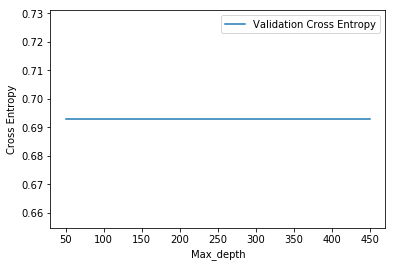

In [17]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

_ = ax.plot(np.linspace(50,450,9),result[:,3],label="Validation Cross Entropy")
_ = ax.set_xlabel("Max_depth")
_ = ax.set_ylabel("Cross Entropy")
_ = ax.legend()

### Random Forest with Different N_estimator

In [19]:
result=RunRandomForest(n_estimators=10,max_depth=10,min_samples_split=10000)
for i in range(20,90,10):
  result = np.concatenate((result,RunRandomForest(n_estimators=i,max_depth=10,min_samples_split=10000)),axis=0)

n_estimators= 10 max_depth= 10 min_samples_split= 10000
0.5448571421780183 0.5054733123615442 0.6890301827817963 0.6928808004830329
n_estimators= 20 max_depth= 10 min_samples_split= 10000
0.5485928934364078 0.5058276508440559 0.6889365462340344 0.6927507858936273
n_estimators= 30 max_depth= 10 min_samples_split= 10000
0.5500071704239424 0.505757324122336 0.6888679789874288 0.6927109894086976
n_estimators= 40 max_depth= 10 min_samples_split= 10000
0.5507020280811232 0.505819536222319 0.6888482156345885 0.6927089513138892
n_estimators= 50 max_depth= 10 min_samples_split= 10000
0.551119576525062 0.506230677056989 0.6888245246172708 0.6926581082651706
n_estimators= 60 max_depth= 10 min_samples_split= 10000
0.5512447618270399 0.5055598683267379 0.6888151092311952 0.6926820608479316
n_estimators= 70 max_depth= 10 min_samples_split= 10000
0.5516084330524059 0.5052109395920509 0.6888193112904593 0.6926958856106489
n_estimators= 80 max_depth= 10 min_samples_split= 10000
0.552186820840025 0.5053

In [0]:
result3=result.copy()

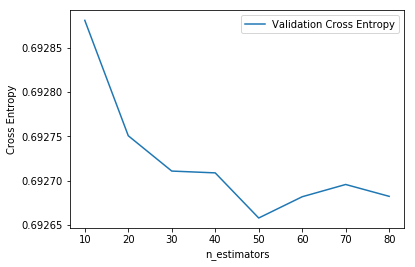

In [23]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

_ = ax.plot(np.linspace(10,80,8),result3[:,3],label="Validation Cross Entropy")
_ = ax.set_xlabel("n_estimators")
_ = ax.set_ylabel("Cross Entropy")
_ = ax.legend()

### Final Random Forest Model

In [24]:
for i in range (2012,2013):  # i = 2012
    train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]  #from 20080101 to 20121231
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))] #from 20130101 to 20131231
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    
    clf=RandomForestClassifier(n_estimators=50,max_depth=10,min_samples_split=10000,n_jobs=-1)
    clf.fit(X_train, Y_train)
    #res=pd.concat((test.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_test))),axis=1)
    res=pd.concat((train.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_train))),axis=1) # in_sample
    res.columns=["id","date",'target',"pred_zsprob_comp","Alp"]
    res.index=range(len(res))
    
    X_train_predict=clf.predict_proba(X_train)
    inAcc=np.mean((X_train_predict[:,1]>=0.5)==(Y_train))
    inCroEntro = -np.mean(np.log(X_train_predict[:,1])*Y_train+(1-Y_train)*np.log(1-X_train_predict[:,1]))
    X_test_predict=clf.predict_proba(X_test)
    outAcc=np.mean((X_test_predict[:,1]>=0.5)==(Y_test))
    outCroEntro = -np.mean(np.log(X_test_predict[:,1])*Y_test+(1-Y_test)*np.log(1-X_test_predict[:,1]))
    print(inAcc,outAcc,inCroEntro,outCroEntro)
    
    globals()["result_{}".format(i)]=res.copy()
    print("result_{}".format(i))

0.5395818932341074 0.5021936648998312 0.6904120650762661 0.6933965597089227
result_2012


In [25]:
for i in range (2012,2017): # i = 2012,2013,2014,2015,2016
    train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))]
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    
    clf=RandomForestClassifier(n_estimators=50,max_depth=10,min_samples_split=10000,n_jobs=-1)
    clf.fit(X_train, Y_train)
    res=pd.concat((test.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_test))),axis=1)
    #res=pd.concat((train.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_train))),axis=1) # in_sample
    res.columns=["id","date",'target',"pred_zsprob_comp","Alp"]
    res.index=range(len(res))
    globals()["result_{}".format(i+1)]=res.copy()
    print("result_{}".format(i+1))

result_2013
result_2014
result_2015
result_2016
result_2017


In [0]:
RES=result_2012
for i in range(2013,2018):
    RES=pd.concat((RES,globals()["result_{}".format(i)]),axis=0)

Random_Forest_tt=RES.merge(data.loc[:,["id","date","ret_raw","ret_20_raw","industry","flag2"]],left_on=["date","id"],right_on=["date","id"],how="left")

### Neuron Network

In [0]:
import tensorflow as tf

In [0]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
    
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [0]:
n_inputs = 33
batch_size = 10000
n_outputs = 2

Simple DNN to Determine Number of Epochs

In [0]:
def RunDNN1(n_hidden1 = 20,n_hidden2 = 20,n_epochs = 100):
  reset_graph()

  X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
  y = tf.placeholder(tf.int32, shape=(None), name="y")

  with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

  with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

  learning_rate = 0.01

  with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

  with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()
  saver = tf.train.Saver()
  
  loss_valid_result = np.zeros(100)
  loss_train_result = np.zeros(100)


  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, Y_train, batch_size):
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
      acc_train = accuracy.eval(feed_dict={X: X_train, y: Y_train})
      acc_valid = accuracy.eval(feed_dict={X: X_test, y: Y_test})
      loss_train = loss.eval(feed_dict={X: X_train, y: Y_train})
      loss_valid = loss.eval(feed_dict={X: X_test, y: Y_test})
      print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_valid,"Batch entropy:",loss_train,"Validation entropy:",loss_valid)
      prob_train = y_proba.eval(feed_dict={X: X_train, y: Y_train})
      prob_valid = y_proba.eval(feed_dict={X: X_test, y: Y_test})
      loss_train_result[epoch]=loss_train
      loss_valid_result[epoch]=loss_valid
  return loss_train_result,loss_valid_result

In [31]:
for i in range (2012,2013):  # i = 2012
    train=data[(data.date<=int(str(i-1)+'1231'))&(data.date>=int(str(i-4)+'0101'))]  #from 20080101 to 20121231
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i)+'0101'))] #from 20130101 to 20131231
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    

    loss_train,loss_valid = RunDNN1()

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
0 Batch accuracy: 0.5030167 Validation accuracy: 0.50715846 Batch entropy: 0.7128365 Validation entropy: 0.71215594
1 Batch accuracy: 0.50314665 Validation accuracy: 0.50597644 Batch entropy: 0.7074902 Validation entropy: 0.7071249
2 Batch accuracy: 0.5033408 Validation accuracy: 0.5060738 Batch entropy: 0.7044321 Validation entropy: 0.70426446
3 Batch accuracy: 0.50322354 Validation accuracy: 0.50532997 Batch entropy: 0.7024621 Validation entropy: 0.70241356
4 Batch accuracy: 0.5031197 Validation accuracy: 0.5050108 Batch entropy: 0.701101 Validation entropy: 0.70112735
5 Batch accuracy: 0.5033939 Validation accuracy: 0.50439405 Batch entropy: 0.70010734 Validation entropy: 0.70018625
6 Batch accuracy: 0.50333446 Validation accuracy: 0.5041506 Batch entropy: 0.6993475 Validation entropy: 0.69946486
7 Batch accuracy: 0.50348896 Validation accuracy: 0.504028

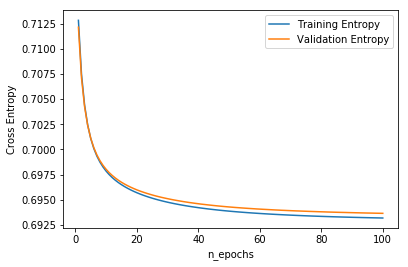

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

_ = ax.plot(np.linspace(1,100,100),loss_train,label="Training Entropy")
_ = ax.plot(np.linspace(1,100,100),loss_valid,label="Validation Entropy")
_ = ax.set_xlabel("n_epochs")
_ = ax.set_ylabel("Cross Entropy")
_ = ax.legend()

### Activation Function
SELU or RELU?

In [0]:
def RunDNN2(n_hidden1 = 20,n_hidden2 = 20,n_epochs = 40):
  reset_graph()

  X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
  y = tf.placeholder(tf.int32, shape=(None), name="y")

  with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.selu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.selu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

  with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

  learning_rate = 0.01

  with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

  with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()
  saver = tf.train.Saver()
  
  loss_valid_result = np.zeros(40)
  loss_train_result = np.zeros(40)


  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, Y_train, batch_size):
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
      acc_train = accuracy.eval(feed_dict={X: X_train, y: Y_train})
      acc_valid = accuracy.eval(feed_dict={X: X_test, y: Y_test})
      loss_train = loss.eval(feed_dict={X: X_train, y: Y_train})
      loss_valid = loss.eval(feed_dict={X: X_test, y: Y_test})
      print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_valid,"Batch entropy:",loss_train,"Validation entropy:",loss_valid)
      prob_train = y_proba.eval(feed_dict={X: X_train, y: Y_train})
      prob_valid = y_proba.eval(feed_dict={X: X_test, y: Y_test})
      loss_train_result[epoch]=loss_train
      loss_valid_result[epoch]=loss_valid
  return loss_train_result,loss_valid_result



In [34]:
for i in range (2012,2013):  # i = 2012
    train=data[(data.date<=int(str(i-1)+'1231'))&(data.date>=int(str(i-4)+'0101'))]  #from 20080101 to 20121231
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i)+'0101'))] #from 20130101 to 20131231
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    

    loss_train2,loss_valid2 = RunDNN2()

0 Batch accuracy: 0.50350004 Validation accuracy: 0.50753444 Batch entropy: 0.72112525 Validation entropy: 0.7193409
1 Batch accuracy: 0.50524074 Validation accuracy: 0.50802404 Batch entropy: 0.70662975 Validation entropy: 0.70563346
2 Batch accuracy: 0.5063841 Validation accuracy: 0.5078428 Batch entropy: 0.70247763 Validation entropy: 0.7019485
3 Batch accuracy: 0.5069696 Validation accuracy: 0.50733966 Batch entropy: 0.7005067 Validation entropy: 0.70038825
4 Batch accuracy: 0.50745684 Validation accuracy: 0.50706106 Batch entropy: 0.69932663 Validation entropy: 0.69943386
5 Batch accuracy: 0.5077484 Validation accuracy: 0.5067148 Batch entropy: 0.6985182 Validation entropy: 0.698803
6 Batch accuracy: 0.5079742 Validation accuracy: 0.5055572 Batch entropy: 0.697915 Validation entropy: 0.69837207
7 Batch accuracy: 0.5083625 Validation accuracy: 0.50550306 Batch entropy: 0.69743824 Validation entropy: 0.6979424
8 Batch accuracy: 0.50851774 Validation accuracy: 0.504862 Batch entropy:

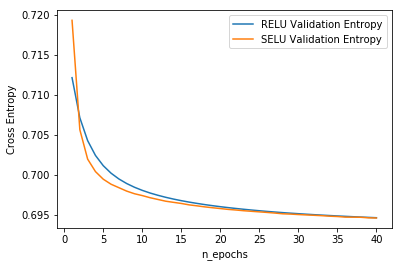

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

_ = ax.plot(np.linspace(1,40,40),loss_valid[:40],label="RELU Validation Entropy")
_ = ax.plot(np.linspace(1,40,40),loss_valid2,label="SELU Validation Entropy")
_ = ax.set_xlabel("n_epochs")
_ = ax.set_ylabel("Cross Entropy")
_ = ax.legend()

### Batch Normalization or Not?



In [0]:
def RunDNN3(n_hidden1 = 20,n_hidden2 = 20,n_epochs = 40):
  reset_graph()
  training = tf.placeholder_with_default(False, shape=(), name='training')

  X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
  y = tf.placeholder(tf.int32, shape=(None), name="y")

  with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1")
    bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
    bn1_act = tf.nn.selu(bn1)
    
    hidden2 = tf.layers.dense(bn1_act, n_hidden2, name="hidden2")
    bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
    bn2_act = tf.nn.selu(bn2)
    
    logits = tf.layers.dense(bn2_act, n_outputs, name="outputs")
    
    y_proba = tf.nn.softmax(logits)

  with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

  learning_rate = 0.01

  with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

  with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()
  saver = tf.train.Saver()
  
  loss_valid_result = np.zeros(40)
  loss_train_result = np.zeros(40)


  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, Y_train, batch_size):
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
      acc_train = accuracy.eval(feed_dict={X: X_train, y: Y_train})
      acc_valid = accuracy.eval(feed_dict={X: X_test, y: Y_test})
      loss_train = loss.eval(feed_dict={X: X_train, y: Y_train})
      loss_valid = loss.eval(feed_dict={X: X_test, y: Y_test})
      print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_valid,"Batch entropy:",loss_train,"Validation entropy:",loss_valid)
      prob_train = y_proba.eval(feed_dict={X: X_train, y: Y_train})
      prob_valid = y_proba.eval(feed_dict={X: X_test, y: Y_test})
      loss_train_result[epoch]=loss_train
      loss_valid_result[epoch]=loss_valid
  return loss_train_result,loss_valid_result

In [37]:
for i in range (2012,2013):  # i = 2012
    train=data[(data.date<=int(str(i-1)+'1231'))&(data.date>=int(str(i-4)+'0101'))]  #from 20080101 to 20121231
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i)+'0101'))] #from 20130101 to 20131231
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    

    loss_train3,loss_valid3 = RunDNN3()

Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use tf.cast instead.
0 Batch accuracy: 0.5025944 Validation accuracy: 0.49280638 Batch entropy: 0.7231569 Validation entropy: 0.7265619
1 Batch accuracy: 0.5033392 Validation accuracy: 0.49638224 Batch entropy: 0.7122897 Validation entropy: 0.7140919
2 Batch accuracy: 0.50373536 Validation accuracy: 0.4978645 Batch entropy: 0.70796496 Validation entropy: 0.70915776
3 Batch accuracy: 0.50399446 Validation accuracy: 0.4987436 Batch entropy: 0.7054623 Validation entropy: 0.7063729
4 Batch accuracy: 0.50412995 Validation accuracy: 0.49974167 Batch entropy: 0.70378464 Validation entropy: 0.70451474
5 Batch accuracy: 0.50447696 Validation accuracy: 0.5007073 Batch entropy: 0.70255464 Validation entropy: 0.7032127
6 Batch accuracy: 0.5046085 Validation accuracy: 0.50125915 Batch entropy: 0.70160073 Validation entropy: 0.7022071
7 Batch accuracy: 0.50512743 Validation accuracy: 0.5016351 Batch e

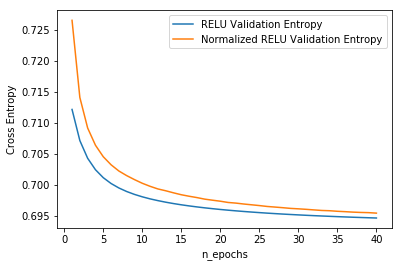

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

_ = ax.plot(np.linspace(1,40,40),loss_valid[:40],label="RELU Validation Entropy")
_ = ax.plot(np.linspace(1,40,40),loss_valid3,label="Normalized RELU Validation Entropy")
_ = ax.set_xlabel("n_epochs")
_ = ax.set_ylabel("Cross Entropy")
_ = ax.legend()

### Dropping out or Not?

In [0]:
def RunDNN4(n_hidden1 = 20,n_hidden2 = 20,n_epochs = 40):
  reset_graph()
  training = tf.placeholder_with_default(False, shape=(), name='training')
  

  X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
  y = tf.placeholder(tf.int32, shape=(None), name="y")
  
  dropout_rate = 0.5  # == 1 - keep_prob
  X_drop = tf.layers.dropout(X, dropout_rate, training=training)

  with tf.name_scope("dnn"):
    ''''
    hidden1 = tf.layers.dense(X_drop, n_hidden1, name="hidden1")
    bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
    bn1_act = tf.nn.relu(bn1)
    bn1_act_drop = tf.layers.dropout(bn1_act, dropout_rate, training=training)
    
    hidden2 = tf.layers.dense(bn1_act_drop, n_hidden2, name="hidden2")
    bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
    bn2_act = tf.nn.relu(bn2)
    bn2_act_drop = tf.layers.dropout(bn2_act, dropout_rate, training=training)
    
    logits = tf.layers.dense(bn2_act_drop, n_outputs, name="outputs")
    '''
    hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.selu,
                              name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    hidden2 = tf.layers.dense(hidden1_drop, n_hidden2, activation=tf.nn.selu,
                              name="hidden2")
    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    logits = tf.layers.dense(hidden2_drop, n_outputs, name="outputs")
    
    
    
    
    y_proba = tf.nn.softmax(logits)

  with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

  learning_rate = 0.01

  with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

  with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()
  saver = tf.train.Saver()
  
  loss_valid_result = np.zeros(40)
  loss_train_result = np.zeros(40)


  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, Y_train, batch_size):
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
      acc_train = accuracy.eval(feed_dict={X: X_train, y: Y_train})
      acc_valid = accuracy.eval(feed_dict={X: X_test, y: Y_test})
      loss_train = loss.eval(feed_dict={X: X_train, y: Y_train})
      loss_valid = loss.eval(feed_dict={X: X_test, y: Y_test})
      print(epoch, "Batch accuracy:", acc_train, "Validation accuracy:", acc_valid,"Batch entropy:",loss_train,"Validation entropy:",loss_valid)
      prob_train = y_proba.eval(feed_dict={X: X_train, y: Y_train})
      prob_valid = y_proba.eval(feed_dict={X: X_test, y: Y_test})
      loss_train_result[epoch]=loss_train
      loss_valid_result[epoch]=loss_valid
  return loss_train_result,loss_valid_result

In [40]:
for i in range (2012,2013):  # i = 2012
    train=data[(data.date<=int(str(i-1)+'1231'))&(data.date>=int(str(i-4)+'0101'))]  #from 20080101 to 20121231
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i)+'0101'))] #from 20130101 to 20131231
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    

    loss_train4,loss_valid4 = RunDNN4()

Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
0 Batch accuracy: 0.5050355 Validation accuracy: 0.50542194 Batch entropy: 0.72551054 Validation entropy: 0.72509825
1 Batch accuracy: 0.50682855 Validation accuracy: 0.5009805 Batch entropy: 0.7093161 Validation entropy: 0.71093047
2 Batch accuracy: 0.5068238 Validation accuracy: 0.49865162 Batch entropy: 0.7051412 Validation entropy: 0.7071664
3 Batch accuracy: 0.5067208 Validation accuracy: 0.49754533 Batch entropy: 0.70304996 Validation entropy: 0.70520234
4 Batch accuracy: 0.5065473 Validation accuracy: 0.49676362 Batch entropy: 0.70170337 Validation entropy: 0.70387137
5 Batch accuracy: 0.506613 Validation accuracy: 0.49689347 Batch entropy: 0.7007228 Validation entropy: 0.70286435
6 Batch accuracy: 0.5066685 Validation accuracy: 0.4967501 Batch entropy: 0.69995403 Validation entropy: 0.70206696
7 Batch acc

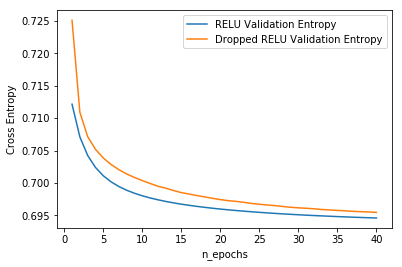

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

_ = ax.plot(np.linspace(1,40,40),loss_valid[:40],label="RELU Validation Entropy")
_ = ax.plot(np.linspace(1,40,40),loss_valid4,label="Dropped RELU Validation Entropy")
_ = ax.set_xlabel("n_epochs")
_ = ax.set_ylabel("Cross Entropy")
_ = ax.legend()

### Final Deep Neuron Network Model

In [0]:
def RunDNN(n_hidden1 = 20,n_hidden2 = 10):
  reset_graph()

  X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
  y = tf.placeholder(tf.int32, shape=(None), name="y")

  with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.selu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.selu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

  with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

  learning_rate = 0.01

  with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

  with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  init = tf.global_variables_initializer()
  saver = tf.train.Saver()

  n_epochs = 40

  with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for X_batch, y_batch in shuffle_batch(X_train, Y_train, batch_size):
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
      acc_train = accuracy.eval(feed_dict={X: X_train, y: Y_train})
      acc_valid = accuracy.eval(feed_dict={X: X_test, y: Y_test})
      loss_train = loss.eval(feed_dict={X: X_train, y: Y_train})
      loss_valid = loss.eval(feed_dict={X: X_test, y: Y_test})
      prob_train = y_proba.eval(feed_dict={X: X_train, y: Y_train})
      prob_valid = y_proba.eval(feed_dict={X: X_test, y: Y_test})
  return acc_train,acc_valid,loss_train,loss_valid,prob_train,prob_valid

In [44]:
for i in range (2012,2013):  # i = 2012
    train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]  #from 20080101 to 20121231
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))] #from 20130101 to 20131231
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    

    acc_train,acc_valid,loss_train,loss_valid,prob_train,prob_valid = RunDNN()
    predict_proba_train = prob_train[:,1]/(prob_train[:,0]+prob_train[:,1])
    predict_proba_test = prob_valid[:,1]/(prob_valid[:,0]+prob_valid[:,1])
    
    
    #res=pd.concat((test.loc[:,['id','date','target']], pd.DataFrame(prob_valid)),axis=1)
    res=pd.concat((train.loc[:,['id','date','target']], pd.DataFrame(prob_train)),axis=1) # in_sample
    res.columns=["id","date",'target',"pred_zsprob_comp","Alp"]
    res.index=range(len(res))
    
    inAcc=acc_train
    inCroEntro = loss_train
    outAcc=acc_valid
    outCroEntro = loss_valid
    print(inAcc,outAcc,inCroEntro,outCroEntro)
    
    globals()["result_{}".format(i)]=res.copy()
    print("result_{}".format(i))

0.51328444 0.49814814 0.6929055 0.6942841
result_2012


In [45]:
for i in range (2012,2017): # i = 2012,2013,2014,2015,2016
    train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))]
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    

    acc_train,acc_valid,loss_train,loss_valid,prob_train,prob_valid = RunDNN()
    predict_proba_train = prob_train[:,1]/(prob_train[:,0]+prob_train[:,1])
    predict_proba_test = prob_valid[:,1]/(prob_valid[:,0]+prob_valid[:,1])
    
    
    res=pd.concat((test.loc[:,['id','date','target']], pd.DataFrame(prob_valid)),axis=1)
    #res=pd.concat((train.loc[:,['id','date','target']], pd.DataFrame(prob_train))),axis=1) # in_sample
    res.columns=["id","date",'target',"pred_zsprob_comp","Alp"]
    
    
    res.index=range(len(res))
    
    inAcc=acc_train
    inCroEntro = loss_train
    outAcc=acc_valid
    outCroEntro = loss_valid
    print(inAcc,outAcc,inCroEntro,outCroEntro)
    
    
    globals()["result_{}".format(i+1)]=res.copy()
    print("result_{}".format(i+1))

0.51328444 0.49814814 0.6929055 0.6942841
result_2013
0.5136392 0.501982 0.69292146 0.6937034
result_2014
0.51205117 0.51342547 0.69299155 0.69301194
result_2015
0.51368004 0.4958967 0.69287175 0.6942763
result_2016
0.5116792 0.5161546 0.69300944 0.6927042
result_2017


In [0]:
RES=result_2012
for i in range(2013,2018):
    RES=pd.concat((RES,globals()["result_{}".format(i)]),axis=0)

DNN_tt=RES.merge(data.loc[:,["id","date","ret_raw","ret_20_raw","industry","flag2"]],left_on=["date","id"],right_on=["date","id"],how="left")

### Back Test Framework

To use this back-test framework, input a dataframe with date, alpha, ret=ret_20_raw, flag as your holding period, and keep the quantile cut at q=0.9.

In [0]:
def back_test(data,q=0.9,Alp="Alpha",flag="flag",date="date",ret="ret_raw",industry="industry",Id="id"):
    data=data[data.id!='GGP US Equity']
    data=data[data.industry!=7777]
    data=data[data.loc[:,flag]==True]
    data=data.loc[:,[date,Id,Alp,ret,industry]]
    data.columns=["Date","Id","Alp","Return","industry"]
    data.index=range(len(data))
    res=data.groupby(("Date")).apply(lambda x: x[x["Alp"]>=x["Alp"].quantile(q)].Return.mean()*0.5-
                          x[x["Alp"]<=x["Alp"].quantile(1-q)].Return.mean()*0.5)
    positions=data.groupby(("Date")).apply(lambda x: x[(x["Alp"]>=x["Alp"].quantile(q))|(x["Alp"]<=x["Alp"].quantile(1-q))])

    long=data.groupby(("Date")).apply(lambda x: x[(x["Alp"]>=x["Alp"].quantile(q))])
    short=data.groupby(("Date")).apply(lambda x: x[(x["Alp"]<=x["Alp"].quantile(1-q))])
    res=res.reset_index()
    res=res.dropna()
    res.index=range(len(res))

    globals()["res"]=res
    plt.figure(figsize=(20,10))
    plt.plot((res.iloc[:,-1]).cumsum())

    n=int(len(res)/30)+1
    plt.xticks(range(0,len(res),n),
               [str(res.loc[i,"Date"]).split(" ")[0] for i in range(0,len(res),n)],
               rotation=70,
              fontsize = 20)
    plt.yticks(fontsize=30)
    plt.axvline(x=len(res[res.Date<20121231]), c="r")

    plt.show()   
    return long,short,res

#### Compute Yearly Return and Sharpe Ratio

In [0]:
def summary_return_sharpe(res,period):
    res.loc[:,"year"]=(res.Date/10000).apply(int)
    Ret=res.groupby("year")[0].sum().reset_index()
    Y10T=0.021
    n=int(253/period)
    Fday=(Y10T+1)**(1/n)-1
    Sharpe=res.groupby("year")[0].apply(lambda x: (x).mean()/((x).std())*np.sqrt(n)).reset_index()
    Performance=Ret.merge(Sharpe,left_on="year",right_on="year",how="left")
    Performance.columns=["Year","Return","Sharpe"]
    return Performance


### Baseline Result

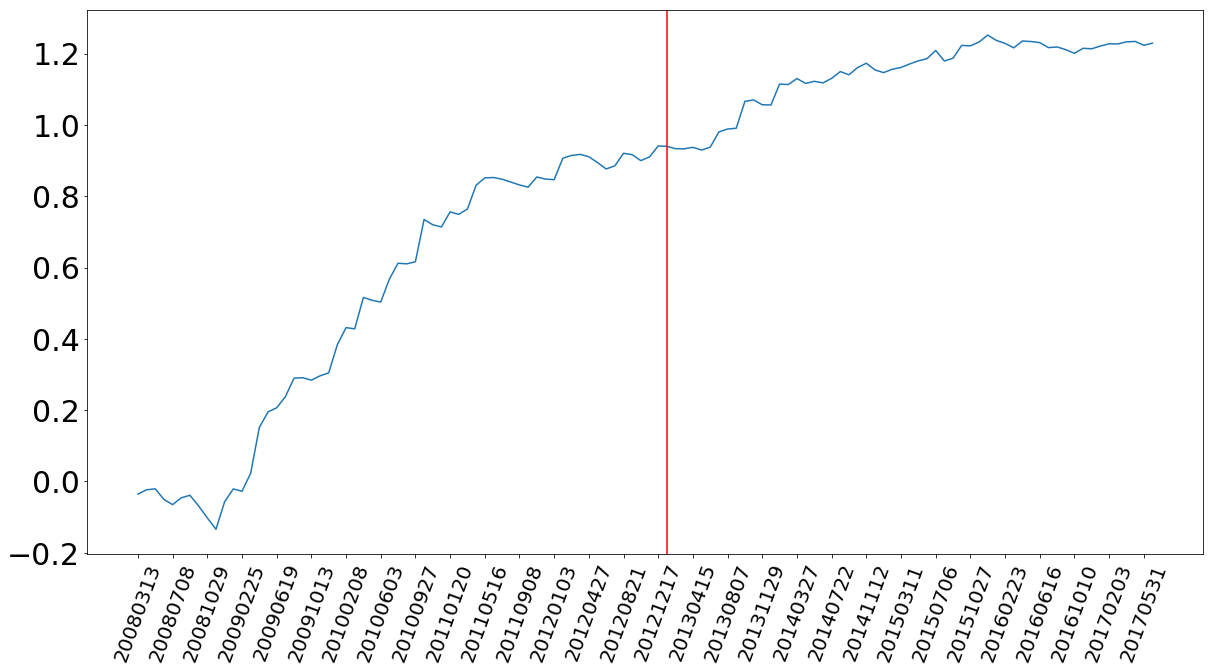

,Year,Return,Sharpe
0,2008,-0.056674,-0.692299
1,2009,0.361200,3.676245
2,2010,0.409331,3.224571
3,2011,0.134093,2.118230
4,2012,0.092953,1.429364
5,2013,0.114847,1.680922
6,2014,0.098261,1.818474
7,2015,0.097750,2.223340
8,2016,-0.038390,-1.367387
9,2017,0.015641,1.587530


In [53]:
a3=back_test(tt,q=0.90,flag="flag2",ret="ret_20_raw",Alp="Alp")
summary_return_sharpe(a3[2],12)

### Random Forest Result

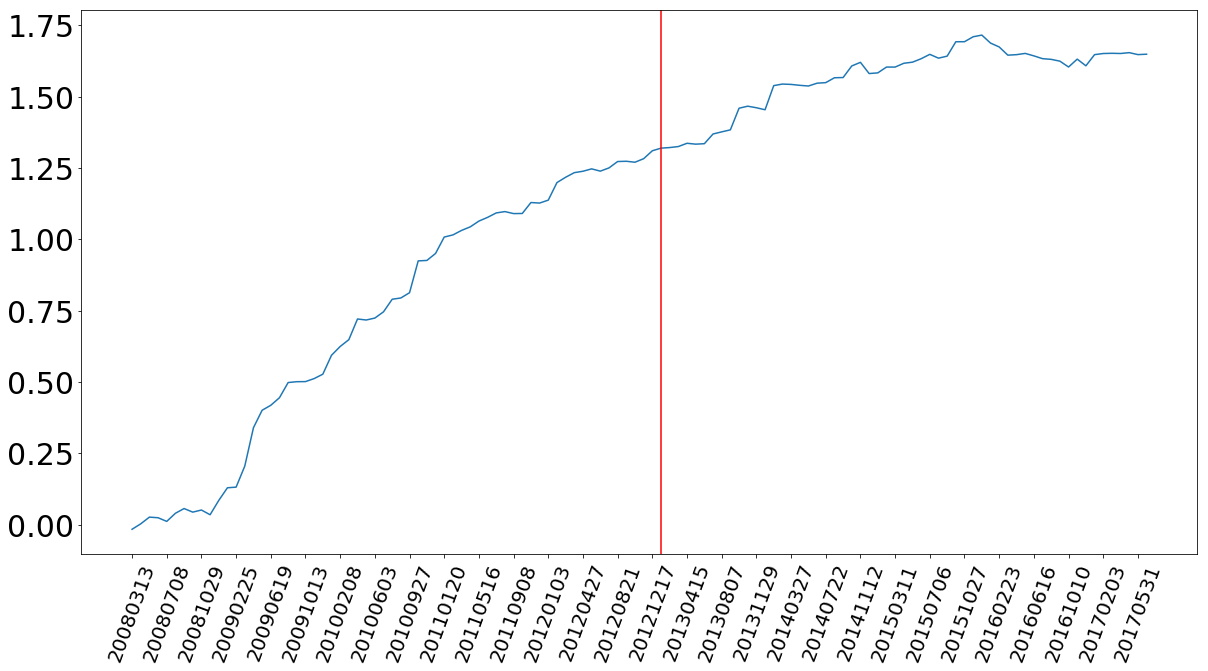

,Year,Return,Sharpe
0,2008,0.085528,1.633732
1,2009,0.442348,4.280952
2,2010,0.423093,4.483873
3,2011,0.176626,3.760834
4,2012,0.183214,3.713652
5,2013,0.143764,2.307007
6,2014,0.126868,1.638843
7,2015,0.134800,3.167101
8,2016,-0.107631,-2.578657
9,2017,0.040660,1.762261


In [54]:
a3=back_test(Random_Forest_tt,q=0.90,flag="flag2",ret="ret_20_raw",Alp="Alp")
summary_return_sharpe(a3[2],12)

### Deep Nuron Network Result

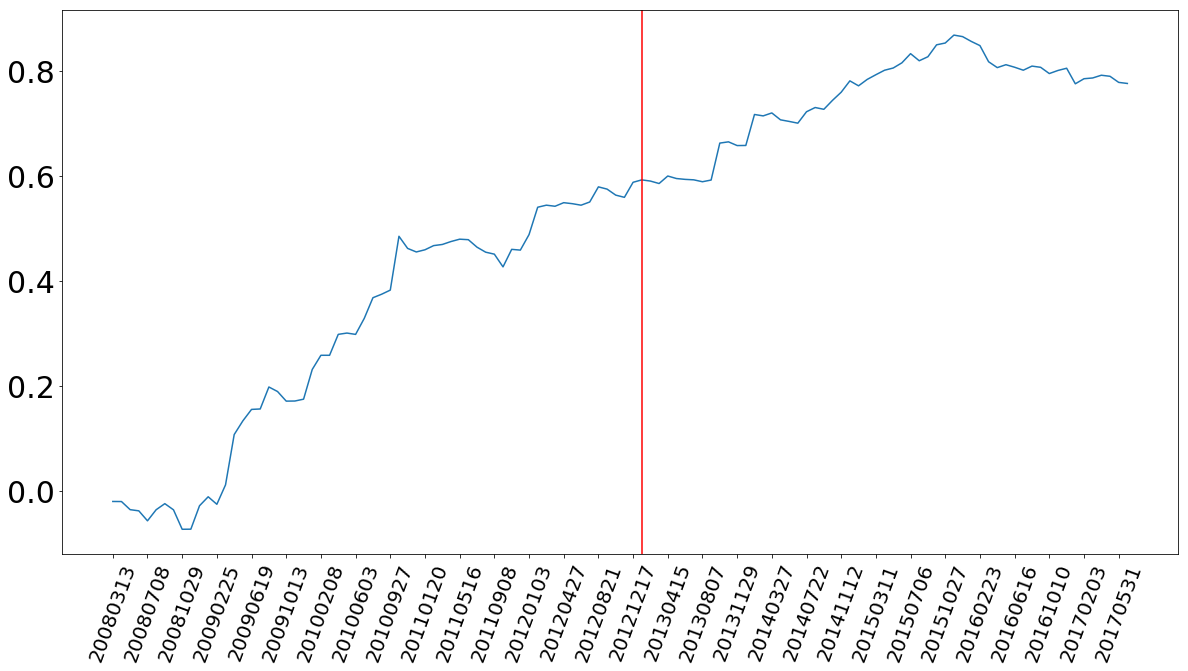

,Year,Return,Sharpe
0,2008,-0.028432,-0.528265
1,2009,0.203136,2.457964
2,2010,0.280576,2.984843
3,2011,0.003518,0.096077
4,2012,0.129240,2.421617
5,2013,0.070187,1.219887
6,2014,0.123115,2.464058
7,2015,0.084334,2.890076
8,2016,-0.060262,-2.146598
9,2017,-0.029014,-1.453523


In [55]:
a3=back_test(DNN_tt,q=0.90,flag="flag2",ret="ret_20_raw",Alp="Alp")
summary_return_sharpe(a3[2],12)